In [1]:
#載入資料
import pandas as pd  
import numpy as np  
import math
df = pd.read_csv('iris.csv')

In [2]:
#split data and train
X = df.iloc[:,:4].values
y = df['species'].replace({'setosa':0,'versicolor':1,'virginica':2}).copy().values

In [3]:
def closest_node(data, t, map, m_rows, m_cols):
    result = (0,0)
    small_dist = 1.0e20
    for i in range(m_rows):
        for j in range(m_cols):
            ed = euc_dist(map[i][j], data[t])
            if ed < small_dist:
                small_dist = ed
                result = (i, j)
    return result
def euc_dist(v1, v2):
    return np.linalg.norm(v1 - v2) 
def manhattan_dist(r1, c1, r2, c2):
    return np.abs(r1-r2) + np.abs(c1-c2)
def r_rate_count(r1, c1, r2, c2):
    return (r1-r2) * (r1-r2) + (c1-c2) * (c1-c2)
def most_common(lst, n):
    if len(lst) == 0: return -1
    counts = np.zeros(shape=n, dtype=np.int)
    for i in range(len(lst)):
        counts[lst[i]] += 1
    return np.argmax(counts)

In [4]:
np.random.seed(1)
Dim = 4
Rows = 39; Cols = 39
RangeMax = Rows + Cols
LearnMax = 0.1
phi = 11.3
StepsMax = 5000
lambda_n = StepsMax / ((Rows / 2) * math.sqrt(2))

In [5]:
map = np.random.random_sample(size=(Rows,Cols,Dim))
for s in range(StepsMax):
    pct_left = 1.0 - ((s * 1.0) / StepsMax)
    curr_range = (int)(pct_left * RangeMax)
    curr_rate = LearnMax * math.exp((-1*s) / lambda_n )
    phi_rate = phi * math.exp((-1*s) / lambda_n )
    t = np.random.randint(len(X))
    (bmu_row, bmu_col) = closest_node(X, t, map, Rows, Cols)
    for i in range(Rows):
        for j in range(Cols):
            r_rate =  math.exp(-1 * (r_rate_count(i, j, bmu_row, bmu_col)/(2 * phi_rate * phi_rate)))
            if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
                map[i][j] = map[i][j] + r_rate * curr_rate * (X[t] - map[i][j])

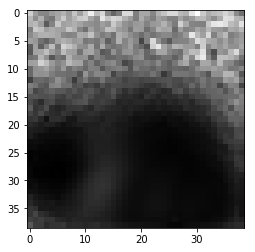

In [7]:
import matplotlib.pyplot as plt
# U-Matrix
u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
for i in range(Rows):
    for j in range(Cols):
        v = map[i][j]
        sum_dists = 0.0; ct = 0
        if i-1 >= 0:    # above
            sum_dists += euc_dist(v, map[i-1][j]); ct += 1
        if i+1 <= Rows-1:   # below
            sum_dists += euc_dist(v, map[i+1][j]); ct += 1
        if j-1 >= 0:   # left
            sum_dists += euc_dist(v, map[i][j-1]); ct += 1
        if j+1 <= Cols-1:   # right
            sum_dists += euc_dist(v, map[i][j+1]); ct += 1
        u_matrix[i][j] = sum_dists / ct
plt.imshow(u_matrix, cmap='gray')  # black = close = clusters

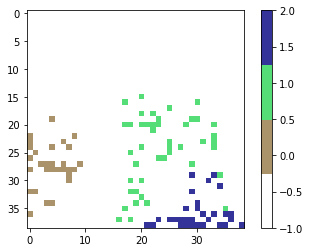

In [8]:
mapping = np.empty(shape=(Rows,Cols), dtype=object)
for i in range(Rows):
    for j in range(Cols):
        mapping[i][j] = []
for t in range(len(X)):
    (m_row, m_col) = closest_node(X, t, map, Rows, Cols)
    mapping[m_row][m_col].append(y[t])
label_map = np.zeros(shape=(Rows,Cols), dtype=np.int)
for i in range(Rows):
    for j in range(Cols):
        label_map[i][j] = most_common(mapping[i][j], 3)
plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
plt.colorbar()
plt.show()